책 : 누구나 파이썬 통계분석 2장 예제

# 1차원 데이터의 정리

## 데이터 중심의 지표

In [2]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한 (판다스 옵션)
pd.set_option('precision', 3) 

In [4]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [5]:
df.shape #row : 50 / collum : 2

(50, 2)

In [6]:
scores = np.array(df['english'])[:10] #영어점수
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [7]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값
* 평균값(mean)은 가장 잘 알려진 대푯값

In [5]:
sum(scores) / len(scores) #합 % 개수

55.0

In [8]:
np.mean(scores) #넘파일 클래스 안에 있는 함수

55.0

In [9]:
scores_df.mean()

score    55.0
dtype: float64

### 중앙값
* 중앙값 median은 데이터를 크기 순서대로 정렬 뒤에 정확하게 중앙에 위치한 값
* 데이터의 개수가 n이 홀수라면, (n+1)/2 번째 데이터가 중앙값 
* 데이터의 개수가 n이 짝수라면, n/2번째 데이터와 n/2+1번째 데이터의 평균이 중앙값

In [10]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [11]:
n = len(sorted_scores)
if n % 2 == 0: #짝수일때
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else: #홀수일때
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [10]:
np.median(scores)

56.5

In [11]:
scores_df.median()

score    56.5
dtype: float64

### 최빈값
* 최빈값(mode)는 데이터에서 가장 많이 나타나는 값 

In [12]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [13]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 데이터의 산포도 지표

### 분산과 표준편차

#### 편차
* 편차는 각 데이터가 평균으로부터 어느 정도 떨어져 있는가를 나타내는 지표

In [12]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [16]:
#벡터연산 : 넘파이나 판다스에서 쓰는 연산 
#(for문을 쓰게 되면 매우 느리다, 벡터연산이 상대적으로 훨씬 빠르다)
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [15]:
sum(deviation)

0.0

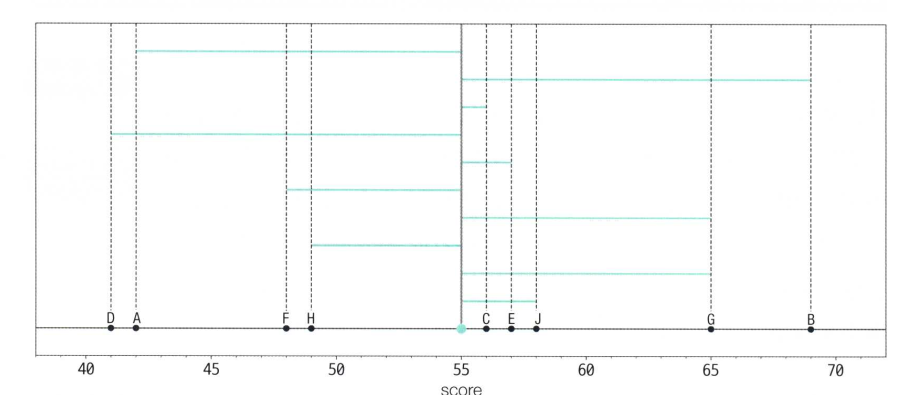

In [14]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59] #10개의 데이터
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [17]:
sum(another_deviation)

0.0

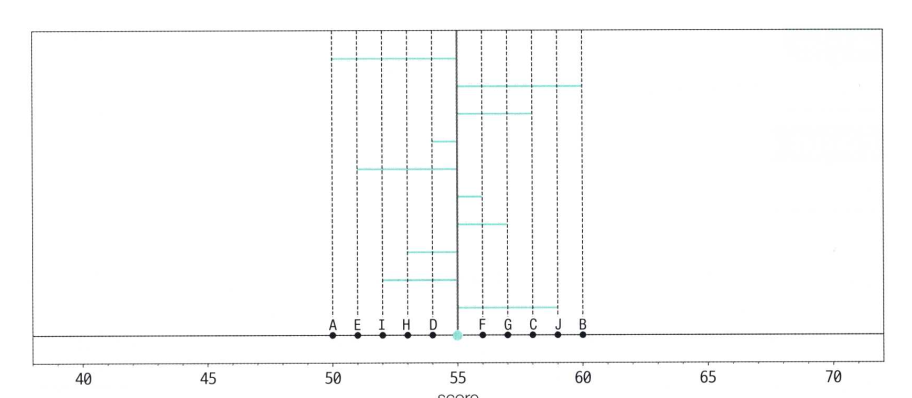

In [40]:
np.mean(deviation)

0.0

In [41]:
np.mean(another_deviation)

0.0

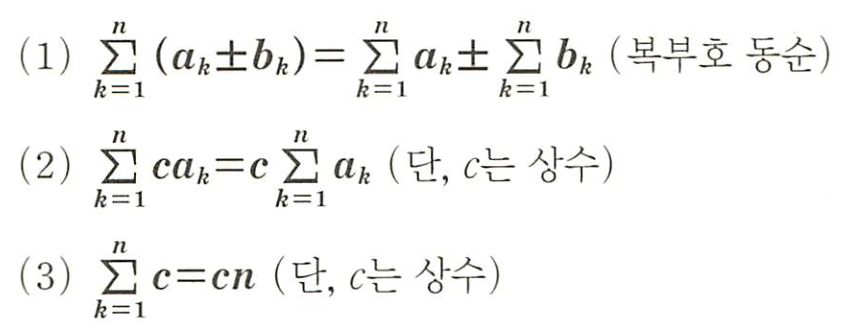

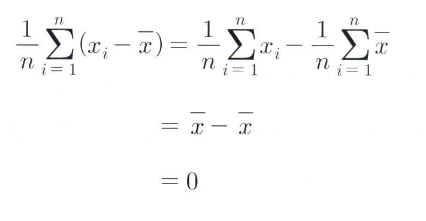

In [42]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [43]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

#### 분산
* 편차의 평균은 항상 0이 되므로 편차의 제곱을 이용한 분산(Variance)를 사용
* var() 함수에는 ddor=0으로 기본설정
* 불편분산은 ddof=1일때 해당(자유도 n-1)
* numpy와 pandas의 기본 설정 값이 다르기 때문에 주의

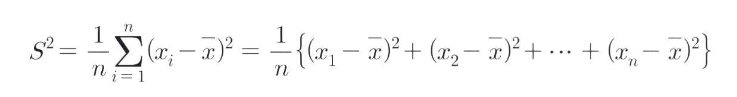

In [44]:
np.mean(deviation ** 2)

86.0

In [45]:
np.var(scores)

86.0

In [46]:
scores_df.var()

score    95.556
dtype: float64

In [47]:
#넘파이와 판다스의 자료구조가 다름
help(np.var) 

Help on function var in module numpy:

var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the variance along the specified axis.
    
    Returns the variance of the array elements, a measure of the spread of a
    distribution.  The variance is computed for the flattened array by
    default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose variance is desired.  If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the variance is computed.  The default is to
        compute the variance of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a variance is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the variance.  For arrays of integer t

In [48]:
help(pd.DataFrame.var)

Help on function var in module pandas.core.generic:

var(self, axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
    Return unbiased variance over requested axis.
    
    Normalized by N-1 by default. This can be changed using the ddof argument
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    ddof : int, default 1
        Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
        where N represents the number of elements.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    
    Returns
    -

In [49]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [50]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

#### 표준편차
* 분산에 제곱근을 취한 표준편차(Standard Deviation)
* 원래의 데이터와 동일한 단위를 쓰는 산포도의 지표가 있다면 도움이 될 것이고, 그 산포도의제곱근을 취한 값이 표준편차

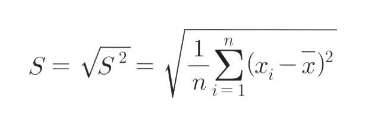

In [51]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [52]:
np.std(scores, ddof=0)

9.273618495495704

In [53]:
df.describe() #기술통계를 보여주는 것

,english,mathematics
count,50.00,50.000
mean,58.38,78.880
std,9.80,8.414
min,37.00,57.000
25%,54.00,76.000
50%,57.50,80.000
75%,65.00,84.000
max,79.00,94.000


### 범위와 4분위수 범위

#### 범위
* 범위(range)는 분산이나 표준편차와 달리, 데이터 전체를 보는 것이 아니라 데이터의 최댓값과 최솟값만으로 산포도를 표현
* 최댓값과 최솟값의 차이가 크면 산포도가 크고, 그 차이가 작다면 산포도가 작다는 의미

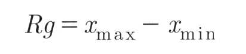

In [54]:
np.max(scores) - np.min(scores)

28

In [55]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

#### 4분위수 범위
* 사분위 범위(interquartile range)에서는 데이터의 하위 25%, 50%, 75%에 위치하는 값
* 이를 각각 제1사분위수, 제2사분위수, 제3사분위수라고 하며, Q1, Q2, Q3로 표시
* Q3 - Q1을 사분위 범위 IQR로 정의

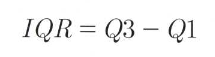

### 데이터의 지표 정리

In [56]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 데이터의 정규화
* 시험 점수는 동일한 60점이라도, 평균 점수가 30점인 어려운 시험에서 얻은 60점과 평균 점수가 90점인 쉬운 시험에서 얻은 60점은 동일하게 해석하면 안됨
* 평균이나 분산에 의존하지 않고도 데이터의 상대적인 위치 관계를 알수 있는 지표가 필요
* 통일된 지표로 변환하는 것을 정규화(normalization)이라고 함

### 표준화
* 데이터에서 평균을 빼고 표준편차로 나누는 작업을 표준화(standardization)
* 표준화된 데이터를 표준화 변량(standardization data) 혹은 Z-점수(Z-score)

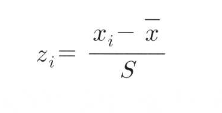

In [57]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [58]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

### 편차값
* 편찻값은 평균이 50, 표준편차가 10이 되도록 정규화한 값

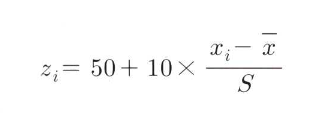

In [59]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [60]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 데이터의 시각화

In [61]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 도수분포표
* 데이터가 취하는 값을 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는가를 세는 존재
* 분할된 구간과 데이터의 개수를 표로 정리한 것이 도수분포표(frequency distribution table)
* 이 때 0 ~ 10점이라는 구간을 계급(class)
* 각 계급에 속한 학생 수를 도수(frequency)
* 각 구간의 폭을 계급표
* 계급의 수를 계급수

In [63]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100)) # _ : 더미변수 -> 데이터는 할당하나 쓰지 않고 버릴 데이터
freq #빈도수

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [64]:
_

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [65]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)] #f스트링 : 3.7이상부터 가능
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


* 계급값 : 각 계급을 대표하는 값으로 계급의 중앙ㄱ밧을 사용
* 60~70의 계급이면 계급값은 65점

In [66]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

* 상대도수는 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도의 비유을 차지하고 있는지를 나타냄

In [67]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

* 누적상대도수는 해당 계급까지의 상대도수의 합을 나타냄

In [68]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [69]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


#### 최빈값 재검토

In [70]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

### 히스토그램
* 히스토그램(histogram)은 도수분포표를 막대그래프로 나타낸 것
* 히스토그램을 사용하여 데이터의 분포 상태를 더욱 시각적으로 파악할 수 있음

In [71]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

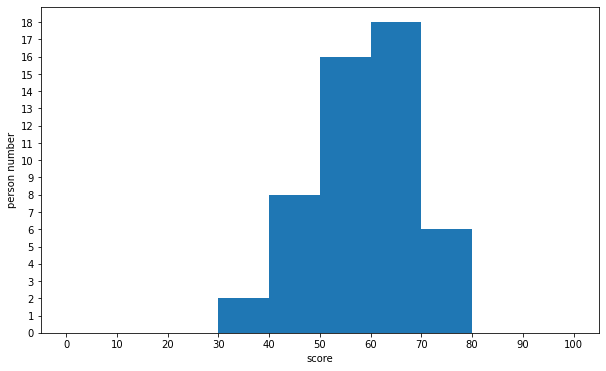

In [72]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

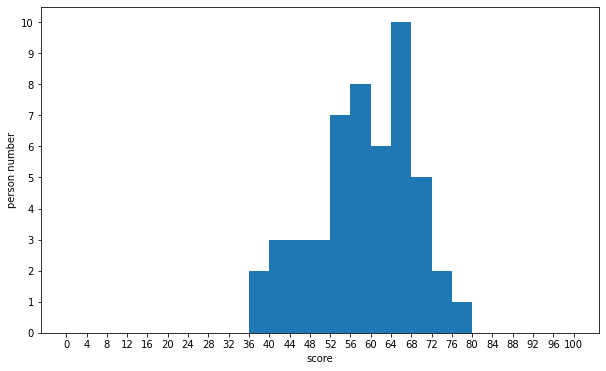

In [73]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

* 상대도수의 히스토그램을 누적상대도수의 꺾은선 그래프와 함께 출력

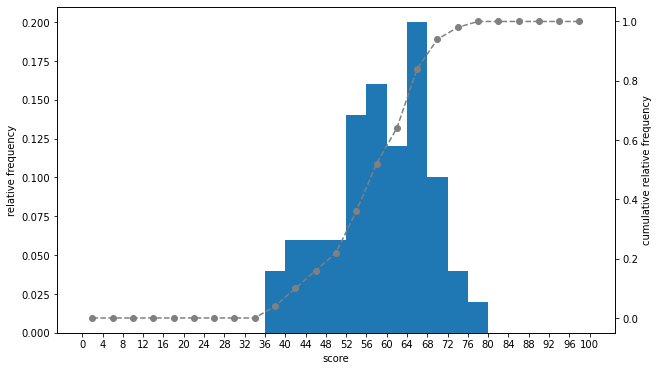

In [74]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 상자 그림
* 상자그림(Box Plot)은 데이터의 산포도를 표현하는 그림
* 상자그림을 그리면 데이터의 분포와 이상값(아웃라이어)을 시각적으로 파악 가능

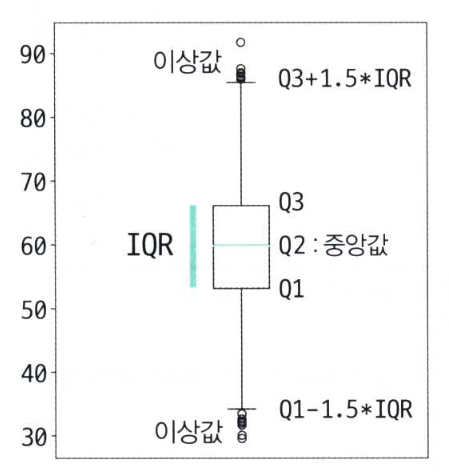

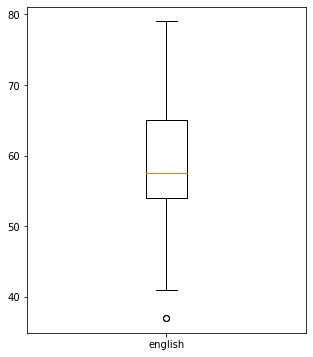

In [75]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()